In [2]:
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb

In [3]:
# train data
def get_train_data(data_size=100):
    data_label = np.zeros((2*data_size, 1))
    # class 1
    # numpy.random.normal(loc=0.0, scale=1.0, size=None) 
    # 得到均值为loc，标准差为scale的正态分布随机数
    x1 = np.reshape(np.random.normal(3, 1, data_size), (data_size, 1))
    y1 = np.reshape(np.random.normal(4, 1, data_size), (data_size, 1))
    data_train = np.concatenate((x1, y1), axis=1)
    data_label[0:data_size, :] = 0
    # class 2
    x2 = np.reshape(np.random.normal(1, 1, data_size), (data_size, 1))
    y2 = np.reshape(np.random.normal(0.5, 1, data_size), (data_size, 1))
    data_train = np.concatenate((data_train, np.concatenate((x2, y2), axis=1)), axis=0)
    data_label[data_size:2*data_size, :] = 1

    return data_train, data_label

In [9]:
data_train, data_label = get_train_data(data_size=100)

In [12]:
# data_train, data_label

In [4]:
# test data
def get_test_data(start, end, data_size=100):
    data1 = (end - start) * np.random.random((data_size, 1)) + start
    data2 = (end - start) * np.random.random((data_size, 1)) + start
    data_test = np.concatenate((data1, data2), axis=1)
    return data_test

In [5]:
# show data distribution
def plot_data(train_data, data_size, test_data):
    plt.figure()
    plt.plot(train_data[0:data_size, 0], train_data[0:data_size, 1], 'g.',
             train_data[data_size:2*data_size, 0], train_data[data_size:2*data_size, 1], 'b*',
             test_data[:, 0], test_data[:, 1], 'rs')
    plt.legend(['class1', 'class 2', 'test_data'])
    plt.title('Distribution')
    plt.grid(True)
    plt.xlabel('axis1')
    plt.ylabel('axis2')
    plt.show()

In [6]:
# plot predict result
def plot_predict_data(train_data, data_size, test_data, predict_res1, predict_res2):
    plt.figure()
    plt.subplot(1, 2, 1)
    plt.plot(train_data[0:data_size, 0], train_data[0:data_size, 1], 'g.',
             train_data[data_size:2*data_size, 0], train_data[data_size:2*data_size, 1], 'b*',
             test_data[:, 0], test_data[:, 1], 'ms')
    plt.legend(['class1', 'class2', 'test_data'])
    plt.title('Distribution')
    plt.grid(True)
    plt.xlabel('axis1')
    plt.ylabel('axis2')

    plt.subplot(1, 2, 2)
    plt.plot(train_data[0:data_size, 0], train_data[0:data_size, 1], 'g.',
             train_data[data_size:2 * data_size, 0], train_data[data_size:2 * data_size, 1], 'b*',
             predict_res1[:, 0], predict_res1[:, 1], 'ro',
             predict_res2[:, 0], predict_res2[:, 1], 'rs')
    plt.legend(['class1', 'class2', 'predict1', 'predict2'])
    plt.title('Predict res')
    plt.grid(True)
    plt.xlabel('axis1')
    plt.ylabel('axis2')
    plt.show()

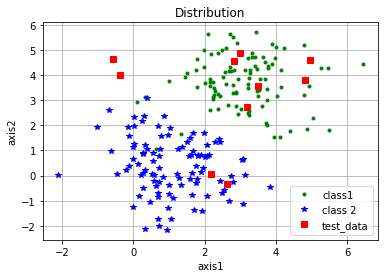

[0.01006117 0.9892937  0.99006385 0.01006117 0.01006117 0.01006117
 0.1765242  0.1765242  0.01006117 0.01922197]


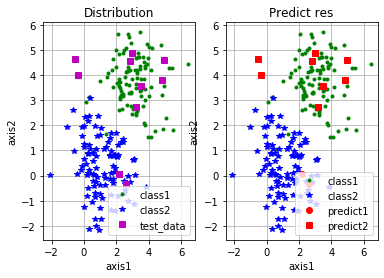

In [8]:
# main function
if __name__ == '__main__':
    data_size = 100
    train_data0, label_data = get_train_data(data_size)  # train data generate
    test_data0 = get_test_data(-1, 5, 10)  # test data
    plot_data(train_data0, data_size, test_data0)  # plot
    # data convert 数据转化为 DMatrix 格式
    train_data = xgb.DMatrix(train_data0, label=label_data)
    test_data = xgb.DMatrix(test_data0)
    
    # data training
    num_round = 50 # 训练轮数
    param = {'booster': 'gbtree', 'eta': 0.1, 'max_depth': 5, 'objective': 'binary:logistic'}
    bst = xgb.train(param, train_data, num_round)

    # make prediction
    predict_res = bst.predict(test_data)
    print(predict_res)
    index1 = predict_res > 0.5
    res1 = test_data0[index1, :]
    res2 = test_data0[~index1, :]

    # plot prediction result
    plot_predict_data(train_data0, data_size, test_data0, res1, res2)

In [ ]:
# 将 DMatrix 格式的数据保存成XGBoost的二进制格式，
# 在下次加载时可以提高加载速度，使用方式如下
dtrain = xgb.DMatrix('train.svm.txt')
dtrain.save_binary("train.buffer")

In [ ]:
# 可以用如下方式处理 DMatrix中的缺失值：
dtrain = xgb.DMatrix( data, label=label, missing = -999.0)

In [ ]:
# 当需要给样本设置权重时，可以用如下方式
w = np.random.rand(5,1)
dtrain = xgb.DMatrix( data, label=label, missing = -999.0, weight=w)

In [ ]:
params = {
    'booster': 'gbtree',
    # 有两中模型可以选择gbtree和gblinear。
    # gbtree使用基于树的模型进行提升计算，gblinear使用线性模型进行提升计算。
    # 缺省值为gbtree
    'objective': 'multi:softmax',  # 多分类的问题
    'num_class': 10,               # 类别数，与 multisoftmax 并用
    'gamma': 0.1,                  # 用于控制是否后剪枝的参数,越大越保守，一般0.1、0.2这样子。
    'max_depth': 12,               # 构建树的深度，越大越容易过拟合
    'lambda': 2,                   # 控制模型复杂度的权重值的L2正则化项参数，参数越大，模型越不容易过拟合。
    'subsample': 0.7,              # 随机采样训练样本
    'colsample_bytree': 0.7,       # 生成树时进行的列采样
    'min_child_weight': 3,
    'silent': 1,                   # 设置成1则没有运行信息输出，最好是设置为0.
    'eta': 0.007,                  # 如同学习率
    'seed': 1000,
    'nthread': 4,                  # cpu 线程数
}

In [ ]:
# 保存模型
bst.save_model('test.model')
# 加载模型
bst = xgb.Booster({'nthread':4}) # init model
bst.load_model("model.bin")      # load data

In [ ]:
#特征重要这儿补充一点：最好使用信息增益重要程度，即 gain=True。
# 原文中使用的是默认的树分裂次数，这个不如信息增益.
pd.Series(
model.booster().get_score(importance_type='gain')).sort_values(
ascending=True)